In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data8=pd.read_csv('C:\\Users\\Rohith varma\\Downloads\\archive (8)\\amazon.csv',encoding="iso-8859-1",parse_dates=['date'])

In [3]:
data8.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [4]:
data8.duplicated().any()

True

In [5]:
data8=data8.drop_duplicates()

In [6]:
#Check null values in dataset 
data8.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [7]:
data8.describe(include='all',datetime_is_numeric=True)

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Setembro,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622853376
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


In [8]:
data8['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [9]:
data8['Month_new']=data8['month'].map({'Janeiro':'jan', 'Fevereiro':'feb', 'Março':'mar', 'Abril':'apr', 'Maio':'may', 'Junho':'jun', 'Julho':'jul',
       'Agosto':'aug', 'Setembro':'sep', 'Outubro':'oct', 'Novembro':'nov', 'Dezembro':'dec'})

In [10]:
data8.head()

,year,state,month,number,date,Month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan
1,1999,Acre,Janeiro,0.0,1999-01-01,jan
2,2000,Acre,Janeiro,0.0,2000-01-01,jan
3,2001,Acre,Janeiro,0.0,2001-01-01,jan
4,2002,Acre,Janeiro,0.0,2002-01-01,jan


In [12]:
#total no of fires registered 
data8.shape

(6422, 6)

In [13]:
#in which month maximum no of forest fires were reported 
data=data8.groupby('Month_new')['number'].sum().reset_index() 
data

,Month_new,number
0,apr,28184.770
1,aug,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,jul,92319.113
6,jun,55997.675
7,mar,30709.405
8,may,34725.363
9,nov,85508.054


<AxesSubplot:xlabel='Month_new', ylabel='number'>

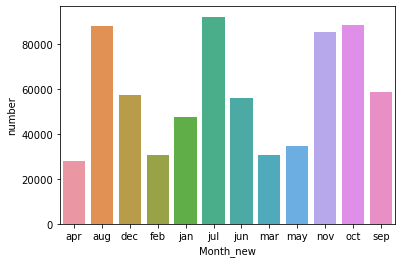

In [14]:
sns.barplot(x="Month_new",y="number",data=data)

In [15]:
#in which year maximum no of forest fires were reportede
data1=data8.groupby('year')['number'].sum().reset_index() 
data1

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<AxesSubplot:xlabel='year', ylabel='number'>

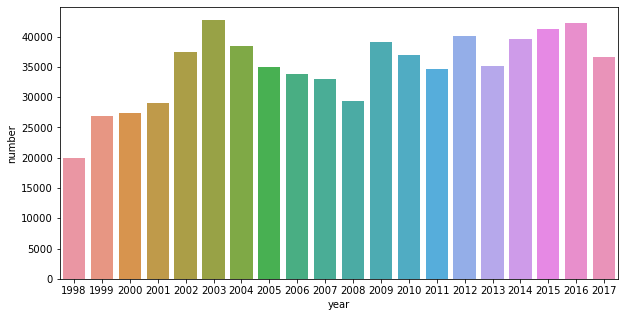

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x="year",y="number",data=data1) 

In [17]:
#in which state max no of fires were reported 
data2=data8.groupby('state')['number'].sum().reset_index() 
data2

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


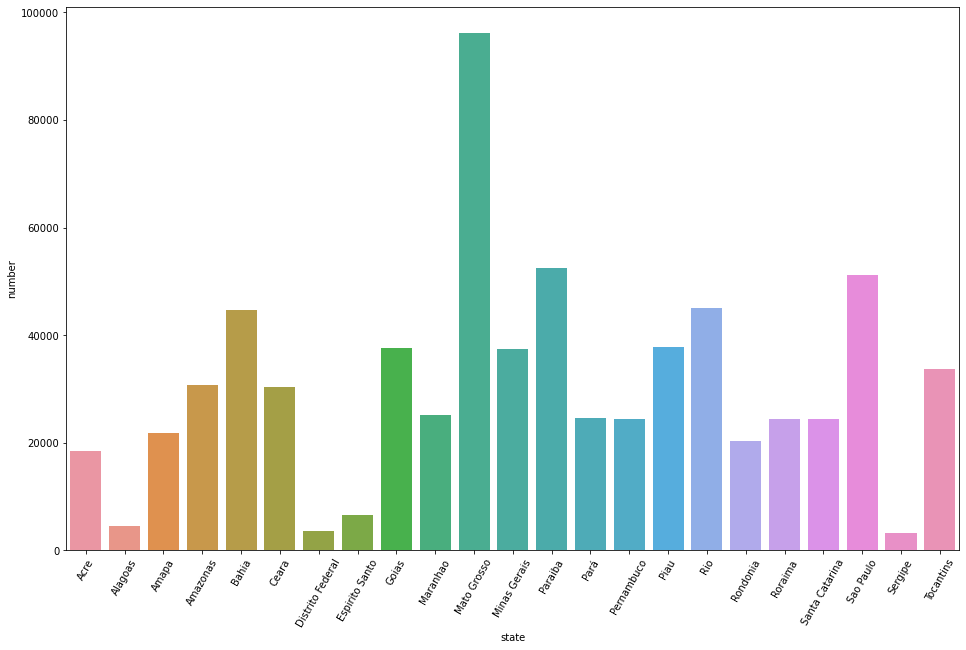

In [18]:
plt.figure(figsize=(16,10))
sns.barplot(x='state',y='number',data=data2) 
plt.xticks(rotation=60) 
plt.show()

In [19]:
#display no of fires reported in amazonas(Year-wise) 
data_am=data8[data8['state']=='Amazonas'] 
data_re=data_am.groupby('year')['number'].sum() 
data_re

year
1998     946.000
1999    1061.000
2000     853.000
2001    1297.000
2002    2852.000
2003    1524.268
2004    2298.207
2005    1657.128
2006     997.640
2007     589.601
2008    2717.000
2009    1320.601
2010    2324.508
2011    1652.538
2012    1110.641
2013     905.217
2014    2385.909
2015    1189.994
2016    2060.972
2017     906.905
Name: number, dtype: float64

In [20]:
#display no of fires were reported in amazonas(Day-wise) 

dataa=data8[data8['state']=="Amazonas"]

In [21]:
day=dataa.groupby(dataa['date'].dt.dayofweek).sum().number

import calendar 
day.index=[calendar.day_name[x] for x in range(0,7)]
day=day.reset_index() 
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<AxesSubplot:xlabel='index', ylabel='number'>

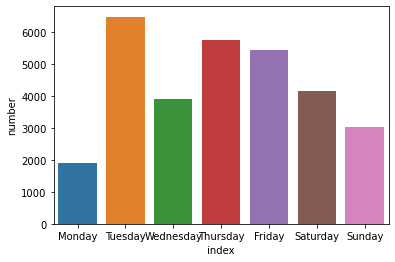

In [22]:
sns.barplot(x="index",y="number",data=day)

In [23]:
#find total no of fires were reported in 2015 and visualize data based on each month. 
data8.columns

Index(['year', 'state', 'month', 'number', 'date', 'Month_new'], dtype='object')

In [24]:
fire=data8[data8['year']==2015].groupby('Month_new')['number'].sum().reset_index()

In [25]:
fire

,Month_new,number
0,apr,2573.000
1,aug,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,jul,4364.392
6,jun,3260.552
7,mar,2202.000
8,may,2384.000
9,nov,4034.518


<AxesSubplot:xlabel='Month_new', ylabel='number'>

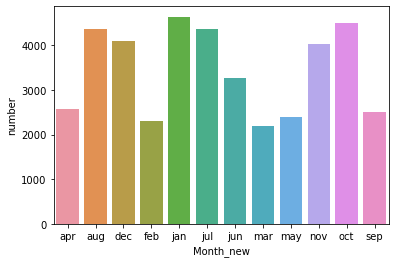

In [26]:
sns.barplot(x='Month_new',y='number',data=fire)

In [27]:
#find avg no of fires were reported from highest to lowest state wise 

data=data8.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()

In [28]:
data

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


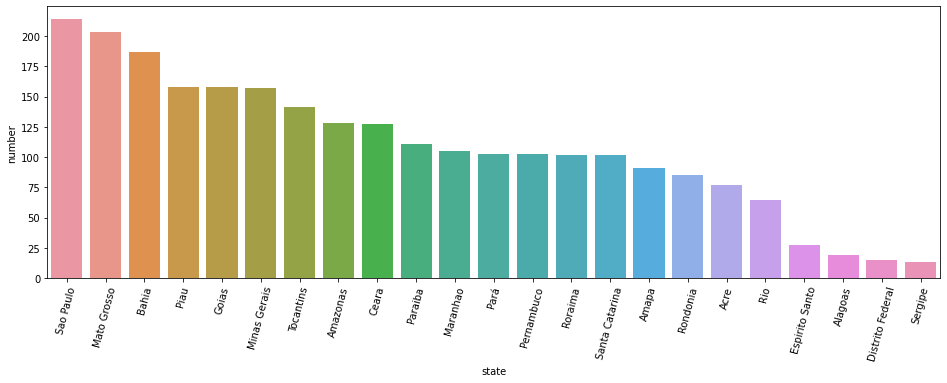

In [29]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=data) 
plt.xticks(rotation=75) 
plt.show()

In [30]:
#to find the state names where fires were reported in dec month 

data8[data8['Month_new']=='dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)